Strucutre du système : \
-> La classe travailleur qui caractérise un worker, avec sa position, sa zone, la commande et l'article qu'il traite\
-> La classe event qui décrit un évènement avec le numéro du worker en question et l'instant de l'évènement\
-> La classe priority_queue qui implément une file de priorité d'évènements en fonction de l'instant de réalisation, avec les méthodes add() et remove()\
-> La classe waiting_order qui définit les élèments dans le bufffer avec le numéro de commande et le prochain article à récupérer\
-> la classe state avec une liste de workers, une liste de buffers (chaque buffer est une liste de waiting_order) et une file de priorité pour gérer les évènements\
-> La classe order qui définit une commande avec le nombre d'articles nb et la liste d'articles item

Le système est caractérisé par un certains nombres de variables qu'on ne modifiera pas, et une liste de commandes "schedule" à traiter

Un simulation est initialisée avec les bones zones, et les états à zéro : initialize_state(zones), zones étant la liste des zones attribuées aux employés (de taille nombre d'employés).\
Le programme tourne avec la fonction principale run() qui fait appel à 4 fonctions qui effectuent chacune des actions de base d'un employé : poser un colis (drop()), le donner à l'employé suivant (give()), ramasser un colis (pick_order()), aller chercher un objet (pick_item())

In [96]:
from random import randint
from random import expovariate as expo
import random
import statistics
start = 0 #temporaire juste pour le premier lancement du programme
end = 0
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [97]:
# définit un employé de la chaîne
class travailleur:
    def __init__(self, _zone):
        self.pos = -1 #position
        self.order = - 1 #le numéro de la commande en cours, -1 le worker est dispo
        self.item = 0 # le numéro du prochain objet à ramasser
        self.zone = _zone #la zone attribuée à l'employé

In [98]:
# définit un évènement (isntant et worker concerné)
class event:
    def __init__(self, t, _nb_worker):
        self.time = t
        self.worker = _nb_worker

    def switch(self, event2):
        self.time, event2.time = event2.time, self.time
        self.worker, event2.worker = event2.worker, self.worker

#définit les règles d'une chaîne de priorité
class priority_queue:
    def __init__(self):
        self.queue = []
    
    def add(self, event1):
        self.queue.append(event1)
        bool = True
        k = len(self.queue) - 2
        while bool:
            if k<0 :
                bool = False
            elif self.queue[k].time<=self.queue[k+1].time:
                bool = False
            else : 
                self.queue[k].switch(self.queue[k+1])
                k-=1
    
    def remove(self):
        if len(self.queue) == 0:
            print("Error")
        else :
            event1 = self.queue[0]
            self.queue = self.queue[1 ::]
            return event1
        
    def affiche(self) :
        mot = ''
        for k in self.queue :
            mot = mot + str(k.worker) + ' ' + str(int(k.time*10)/10) + '|'
        print(mot)

In [99]:
#définit une commande qui attend dans un buffer
class waiting_order:
    def __init__(self, _order, _item) :
        self.order = _order
        self.item = _item

In [100]:
# définit l'état du système
class state:
    def __init__(self, n, zones):
        self.workers = []
        for k in range(n): #le nombre d'employés
            self.workers.append(travailleur(zones[k]))
        self.buffer=[] # liste des buffers, chaque buffer contient des commandes
        for k in range(n-1):
            self.buffer.append([])
        self.events = priority_queue()
        for k in range(n):
            self.events.add(event(0 , k))

In [101]:
# Une commande
class order:
    def __init__(self, n = -1, items = []):
        if n!=-1:
            self.nb = n
            self.items = items
            self.items.sort()
        else : 
            self.n = randint(start, end)
#             print(self.n)
#             print(warehouse)
            self.items = random.sample(range(warehouse), self.n)
            self.items.sort()     

In [102]:
#caractéristiques du système
nb_workers = 3 #nb d'employés
warehouse = 150 #nb de cases de la chaîne
buffer_size = [10] * (nb_workers - 1) #taille de chaque buffer
speed = [10] * nb_workers #vitesse moyenne des employés
zones = [0] * nb_workers #zones attribuées aux employés
current_state = state(nb_workers , zones)
time = 0
time_max = 8*60*60 #durée d'une journée

start = 6 #taille min commande inclue
end = 13 #taille max commande exclue

In [103]:
# Initialise une liste de commandes
def list_commands(length=1000):
    # length = 1000 #taille de la commande
    schedule = []
    for k in range(length):
        schedule.append(order())
    commands = []
    for k in range(length):
        commands.append(schedule[k].items)
    return commands

In [104]:
'''
# save lists to files
for i in range(20):
    with open(r'./data/schedule_' + str(i) + '.txt', 'w') as fp:
        for command in list_commands():
            fp.write(' '.join(str(item) for item in command))
            fp.write('\n')
            
'''

"\n# save lists to files\nfor i in range(20):\n    with open(r'./data/schedule_' + str(i) + '.txt', 'w') as fp:\n        for command in list_commands():\n            fp.write(' '.join(str(item) for item in command))\n            fp.write('\n')\n            \n"

In [105]:
 
# opening the file in read mode
with open(r'./data/schedule_' + str(1) + '.txt', 'r') as fp:
    commands = []
    for line in fp:
        commands.append([int(item) for item in line.split()])
    print(commands)

[[62, 73, 75, 80, 105, 107, 140], [6, 17, 28, 62, 70, 75, 85, 104, 112, 149], [23, 41, 54, 58, 69, 73, 87, 104, 111, 123, 142], [4, 16, 28, 58, 67, 83, 91, 97, 100, 103, 110, 115, 146], [1, 20, 52, 54, 61, 66, 85, 95, 103, 145], [13, 33, 52, 84, 121, 145, 149], [42, 86, 122, 133, 143, 145], [0, 2, 4, 6, 21, 35, 55, 103, 113, 140], [10, 15, 34, 49, 77, 88, 92, 101, 129, 144], [3, 6, 8, 25, 38, 40, 48, 77, 79, 133, 149], [3, 43, 63, 65, 112, 124], [2, 12, 14, 36, 72, 87, 90, 104, 112, 136, 138], [7, 8, 13, 45, 48, 74, 91, 98, 120, 144, 145, 148], [22, 44, 69, 88, 139, 142], [0, 1, 6, 24, 38, 52, 68, 98, 105, 106, 132, 140], [10, 30, 39, 43, 63, 71, 82, 97, 107, 109, 120, 133, 148], [4, 13, 55, 80, 82, 104, 116], [10, 35, 36, 39, 61, 72, 85, 96, 114], [44, 53, 55, 59, 69, 76, 95, 120, 123, 128, 145, 148], [5, 6, 11, 31, 36, 37, 41, 114, 116, 130, 139, 147, 148], [8, 21, 35, 77, 99, 110, 124, 142, 145, 147], [17, 28, 51, 69, 88, 107], [21, 54, 82, 86, 88, 96, 104, 146, 147], [17, 18, 39, 9

In [106]:
#fonctions d'un worker
#poser 1 colis dans le buffer ou les mains du suivant si dispo
def drop(worker):
    if worker + 1 == nb_workers : #dernier worker
        #print(str(worker)+"drop1")
        current_state.workers[worker].pos = warehouse
        current_state.workers[worker].order = -1
        pick_order(worker)
    elif current_state.workers[worker + 1].pos > current_state.workers[worker]. zone : #le worker suivant ne bloque pas
        if len(current_state.buffer[worker]) < buffer_size[worker] : #le buffer n'est pas plein, on peut poser le colis
            #print(str(worker)+"drop2")
            current_state.workers[worker].pos = current_state.workers[worker].zone
            current_state.buffer[worker].append(waiting_order(current_state.workers[worker].order, current_state.workers[worker].item))
            current_state.workers[worker].order = -1
            pick_order(worker)
        else : #le buffer est plein
            #print(str(worker)+"drop3")
            current_state.workers[worker].pos = current_state.workers[worker].zone - 1
            for event1 in current_state.events.queue :
                if event1.worker == worker + 1 :
                     current_state.events.add(event(event1.time, worker))  #on attend que le worker suivant fasse un mouvement         
    elif current_state.workers[worker + 1].pos == current_state.workers[worker].pos + 1 : #le worker suivant est disponible
        #print(str(worker)+"drop4")
        if current_state.workers[worker + 1].order == -1 : 
            give(worker)
        else :
            for event1 in current_state.events.queue :
                if event1.worker == worker + 1 :
                    current_state.events.add(event(event1.time, worker))  #on attend que le worker suivant fasse un mouvement
    else : #le worker suivant bloque et est occupé
        #print(str(worker)+"drop5")
        current_state.workers[worker].pos = current_state.workers[worker + 1].pos - 1
        for event1 in current_state.events.queue :
                if event1.worker == worker + 1 :
                     current_state.events.add(event(event1.time, worker))  #on attend que le worker suivant fasse un mouvement 

#donner un colis au suivant
def give(worker) :
    #print(str(worker)+"give")
    current_state.workers[worker + 1].order = current_state.workers[worker].order
    current_state.workers[worker + 1].item = current_state.workers[worker].item
    current_state.workers[worker].order = -1
    pick_order(worker)

#aller chercher un colis (buffer ou se rendre disponible)
def pick_order(worker) :
    global pick_rate
    global pick_times
     
    if worker == 0 : # pas de problème de buffer
        #print(str(worker)+"pick_order1")
        current_state.workers[worker].pos = 0
        current_state.workers[worker].order = pick_rate
        current_state.workers[worker].item = 0
        pick_rate = pick_rate + 1
        pick_times += [time]
        #print(pick_rate)
        #print('pick_times', pick_times)
        current_state.events.add(event(time, worker))
    elif len(current_state.buffer[worker -1]) > 0 : # le buffer n'est pas vide
        #print(str(worker)+"pick_order2")
        current_state.workers[worker].pos = current_state.workers[worker - 1].zone
        current_state.workers[worker].order = current_state.buffer[worker - 1][0].order
        current_state.workers[worker].item = current_state.buffer[worker - 1][0].item
        current_state.buffer[worker - 1] = current_state.buffer[worker - 1][1::]
        current_state.events.add(event(time, worker))
    else : # le buffer est vide, le worker va se signaler auprès du précédent
        #print(str(worker)+"pick_order3")
        current_state.workers[worker].pos = current_state.workers[worker - 1].pos + 1
        for event1 in current_state.events.queue :
                if event1.worker == worker - 1 :
                     current_state.events.add(event(event1.time, worker))  #on attend que le worker précédent fasse un mouvement 

#aller chercher un objet
def pick_item(worker):
    global lead_times
    item = current_state.workers[worker].item
    order = current_state.workers[worker].order
    if (worker + 1 < nb_workers) and (commands[order][item]>=current_state.workers[worker + 1].pos): #bloqué par le suivant
        #print(str(worker)+"pick_item1")
        current_state.workers[worker].pos = current_state.workers[worker + 1].pos - 1
        for event1 in current_state.events.queue :
            if event1.worker == worker + 1 :
                current_state.events.add(event(event1.time, worker))  #on attend que le worker suivant fasse un mouvement 
    else :
        #print(str(worker)+"pick_item2")
        current_state.workers[worker].pos = commands[order][item]
        current_state.workers[worker].item = current_state.workers[worker].item + 1
        tprime = expo(1/speed[worker])
        current_state.events.add(event(time + tprime, worker))
        lead_times[order] += tprime


In [107]:
# définir les zones attribuées aux employés
def setZones (_zones):
    zones = _zones.copy()
    for k in range(nb_workers):
        current_state.workers[k].zone = _zones[k]

In [108]:

#initialise les paramètres d'état
def initialize_state(zones) : 
    #Initialisation du système 
    global current_state
    current_state = state(nb_workers , zones)
    global time
    time = 0
    global lead_times
    lead_times = [0] * len(commands)

    #Initialisation des workers
    global pick_rate
    global pick_times
    pick_rate = nb_workers
    pick_times = []
    
    for k in range(nb_workers):
        current_state.workers[k].order = nb_workers - k - 1

#fait tourner la simulation pour l'état en cours
def run():
    #boucle principale
    global time
    global current_state
    global time_max
    global schedule
    global lead_times

    while time < time_max:
        current_event = current_state.events.remove()
        time = current_event.time
        worker = current_event.worker
        worker_state = current_state.workers[worker]

        if worker_state.order == -1 : #le worker est disponible
            pick_order(worker)
        elif worker_state.item >= len (commands[worker_state.order]) : #la commande est prête
            #print("alpha")
            drop(worker)
        else : 
            # le worker suivant est diponible
            if (worker + 1 != nb_workers) and (current_state.workers[worker + 1].pos == worker_state.pos + 1) and (current_state.workers[worker + 1].order == -1) :
                give(worker)
            else : #le worker suivant est occupé
                if commands[worker_state.order][worker_state.item] > worker_state.zone : # le prochain objet n'est pas dans la zone du worker
                    #print("beta" + str(schedule[worker_state.order].item[worker_state.item]))
                    drop(worker)
                else :  
                    pick_item(worker)
        #current_state.events.affiche()
        #print(str(worker) + " " + str(worker_state.pos) + " " + str(worker_state.order) + " " + str(worker_state.item), end = "  ||  ")
        #print(schedule[worker_state.order].item, end ='  ||  ')
        #print(str(len(current_state.buffer[0])) + " " + str(len(current_state.buffer[1])))

    return pick_rate, statistics.mean(lead_times)

In [109]:
#tester GIT#choisir les zones
zones = [50, 105, 150]
pick_rate, lead_time = 0, 0
ps_times = [] 
for k in range(10):
    #initialiser les états
    initialize_state(zones)
    #faire tourner la boucle principale
    pick_times = []
    _pick_rate, _lead_time = run()    
    pick_rate += _pick_rate
    lead_time += _lead_time
print(pick_rate/10, lead_time/10)

168.6 80.86867455529088


In [110]:
pick_rate, lead_time = 0, 0
print(pick_rate, lead_time)

0 0


(array([15., 21., 19., 19., 12., 13., 22., 21., 14., 13., 17., 16., 16.,
        22., 18., 16., 16., 19., 15., 11., 19., 19., 15., 16., 15., 21.,
        17., 19., 19., 13., 13., 15., 14., 14., 18., 20., 14., 16., 19.,
        18., 23., 14., 18., 14., 15., 20., 17., 12., 16., 22.]),
 array([   67.47901249,   641.64150203,  1215.80399156,  1789.9664811 ,
         2364.12897063,  2938.29146017,  3512.4539497 ,  4086.61643924,
         4660.77892877,  5234.94141831,  5809.10390784,  6383.26639738,
         6957.42888691,  7531.59137645,  8105.75386599,  8679.91635552,
         9254.07884506,  9828.24133459, 10402.40382413, 10976.56631366,
        11550.7288032 , 12124.89129273, 12699.05378227, 13273.2162718 ,
        13847.37876134, 14421.54125087, 14995.70374041, 15569.86622995,
        16144.02871948, 16718.19120902, 17292.35369855, 17866.51618809,
        18440.67867762, 19014.84116716, 19589.00365669, 20163.16614623,
        20737.32863576, 21311.4911253 , 21885.65361483, 22459.816104

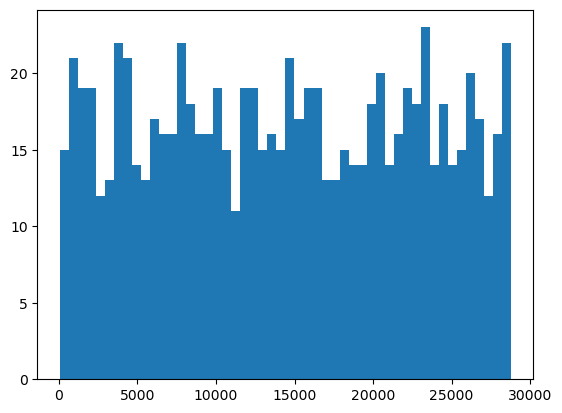

In [111]:
plt.hist(pick_times, 50)

In [112]:
pick_rates_a = np.zeros((15,15))
lead_times_a = np.zeros((15,15))
for i in range(20):
    with open(r'./data/schedule_' + str(i) + '.txt', 'r') as fp:
        commands = []
        for line in fp:
            commands.append([int(item) for item in line.split()])
        #print(commands)
        for w1 in range(15):
            print("Executing for w1 " + str(45+w1))
            for w2 in range(15):
                zones = [45+w1, 90+w2, 150]
                pick_rate, lead_time = 0, 0
                #initialiser les états
                initialize_state(zones)
                #faire tourner la boucle principale
                _pick_rate, _lead_time = run()    
                pick_rates_a[w1, w2] += _pick_rate
                lead_times_a[w1, w2] += _lead_time

                # print("     Completed for w2 " + str(90+w2))
    print("Completed for i " + str(i))


Executing for w1 45
Executing for w1 46
Executing for w1 47
Executing for w1 48
Executing for w1 49
Executing for w1 50
Executing for w1 51
Executing for w1 52
Executing for w1 53
Executing for w1 54
Executing for w1 55
Executing for w1 56
Executing for w1 57
Executing for w1 58
Executing for w1 59
Completed for i 0
Executing for w1 45
Executing for w1 46
Executing for w1 47
Executing for w1 48
Executing for w1 49
Executing for w1 50
Executing for w1 51
Executing for w1 52
Executing for w1 53
Executing for w1 54
Executing for w1 55
Executing for w1 56
Executing for w1 57
Executing for w1 58
Executing for w1 59
Completed for i 1
Executing for w1 45
Executing for w1 46
Executing for w1 47
Executing for w1 48
Executing for w1 49
Executing for w1 50
Executing for w1 51
Executing for w1 52
Executing for w1 53
Executing for w1 54
Executing for w1 55
Executing for w1 56
Executing for w1 57


KeyboardInterrupt: 

In [ ]:
np.save('pick_rates_a.txt', pick_rates_a)

In [ ]:
np.save('pick_rates_a.txt', lead_times_a)

In [ ]:
pick_rates_a = np.load('pick_rates_a.txt.npy')

In [ ]:
pick_rates_a.shape

In [ ]:
from mpl_toolkits import mplot3d


fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
x = np.arange(45,60)
y = np.arange(95,110)

X, Y = np.meshgrid(x, y)

 
# plotting
ax.plot_wireframe(X, Y, pick_rates_a, color='green')
ax.set_title('3D line plot pick rates')
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio


x = np.arange(45,60)
y = np.arange(95,110)

xx, yy = np.meshgrid(x, y)
z = pick_rates_a

def plot_wireframe(xx, yy, z, color='#0066FF', linewidth=1):
    line_marker = dict(color=color, width=linewidth)
    lines = []
    for i in xx:
        for j in yy:
            lines.append(go.Scatter3d(x=i, y=j, z=z[i-45, j-95], mode='lines', line=line_marker))
    yy, xx = np.meshgrid(y, x)

    for j in yy:
        for i in xx:
            lines.append(go.Scatter3d(x=i, y=j, z=z[i-45, j-95], mode='lines', line=line_marker))
    
    
        
    layout = go.Layout(showlegend=False)
    return go.Figure(data=lines, layout=layout)


fig = plot_wireframe(xx, yy, z)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Calcul du pick_rate moyen

In [ ]:
"""Paramètres :
nb_w le nombre de workers
zb l'emplacement des buffers

Sortie :
le pick rate
"""
def pick_rate_moyen(nb_w,zb,N):
    global nb_workers 
    nb_workers = nb_w
    pick_rates_a = 0
    lead_times_a = 0
    for i in range(20):
        with open(r'./data/schedule_' + str(i) + '.txt', 'r') as fp:
            commands = []
            for line in fp:
                commands.append([int(item) for item in line.split()])
            

        zb.append(N)
        initialize_state(zb)
        zb.pop()
        _pick_rate, _lead_time = run()  
        pick_rates_a += _pick_rate/20
        lead_times_a += _lead_time/20
    return pick_rates_a

Golden-section search version dichotomique

In [ ]:
"""Paramètres :
nb_w le nombre de workers
zb la position actuelle des buffers
i la coordonnée sur laquelle exploer
N le nombre d'emplacements

Sortie :
l'emplacement qui donne le pick-rate maximal
"""
def gss(nb_w, zb,N,i):
    zb.append(N+1)
    zb.insert(0,-1)
    i +=1
    x1 = zb[i-1]+1
    x3=zb[i+1]-1
    x2=x1+(x3-x1)/(1.5+sqrt(5)/2)
    x2=int(x2)
    zb[i]=x1
    f1 = pick_rate_moyen(nb_w, zb[1:nb_w],N)
    zb[i]=x2
    f2 =pick_rate_moyen(nb_w, zb[1:nb_w],N)
    zb[i]=x3
    f3 = pick_rate_moyen(nb_w, zb[1:nb_w],N)
    swi = True
    x4=x1+x3-x2
    while x1!=x3:
        if x3-x1<=1:
            zb.pop()
            zb.pop(0) 
            print("*")
            print(zb)  
            if f1<f3:
                return x1
            return x3
        if swi :
            x4 =x1+x3-x2
            if x4==x3:
                x4=x3-1
            zb[i]=x4
            f4=pick_rate_moyen(nb_w, zb[1:nb_w],N)
            if f4>f2:
                x2,x1=x4,x2
                f2,f1=f4,f2
            else : 
                x3=x4
                f3=f4
            swi = x2<(x1+x3)/2
        else :
            x4 =x1+x3-x2
            if x4==x1:
                x4=x1+1
            zb[i]=x4
            f4=pick_rate_moyen(nb_w, zb[1:nb_w],N)
            if f4>f2:
                x2,x3=x4,x2
                f2,f3=f4,f2
            else : 
                x1=x4
                f1=f4
            swi = x2<(x1+x3)/2
    zb.pop()
    zb.pop(0) 
    print("*")
    print(zb)    
    return x1

Heuristique du super-worker

In [ ]:
"""Paramètres :
nb_w le nombre de workers
buffer_opt_2 l'emplacement optimal du buffer pour 2 workers
lambda la vitesse des employés

Sortie :
zb la liste d'emplacements des buffers
pr le pick rate pour cette configuration
"""

def zbuffer_sw(nb_w, buffer_opt_2, N, lambd):
    global warehouse
    global buffer_size
    global speed
    global zones
    nb_worker = nb_w
    warehouse = 150 #nb de cases de la chaîne
    buffer_size = [10] * (nb_workers - 1) #taille de chaque buffer
    speed = [10] * nb_workers #vitesse moyenne des employés
    zones = [0] * nb_workers #zones attribuées aux 
    
    if nb_w == 2:
        return ([buffer_opt_2],pick_rate_moyen(nb_w,[buffer_opt_2],N))
    
    (zb , pr) = zbuffer_sw (nb_w-1, buffer_opt_2, N, lambd)
    lambd_sw = time_max/9/pr
    print(lambd_sw)
    buffer_sw = (lambd*buffer_opt_2*N)/(lambd*buffer_opt_2+lambd_sw*(N-buffer_opt_2))
    buffer_sw = round(buffer_sw)
    print(buffer_sw)
    for i in range(len(zb)):
        zb[i]=round(zb[i]*buffer_sw/N)
    zb.append(buffer_sw)

    pr = pick_rate_moyen(nb_w,zb,N)
    return (zb,pr)


In [ ]:
zb, pr = zbuffer_sw(3, 79, 150, 10)
print(zb,pr)

In [ ]:
global nb_worker
nb_worker = 2
warehouse = 150 #nb de cases de la chaîne
buffer_size = [10] * (nb_workers - 1) #taille de chaque buffer
speed = [10] * nb_workers #vitesse moyenne des employés
zones = [0] * nb_workers #zones attribuées aux employés

buffer_opt_2 = gss(2, [75], 150, 0)
print(buffer_opt_2)

Algo de descente par coordonnées

In [ ]:
"""Paramètres :
nb_w le nombre de workers
eps, le critère d'arrêt, i.e. la marge donné sur l'évolution entre cahque étape
N le nombre d'emplacements

Sortie :
zb la liste d'emplacements des buffers
pr le pick rate pour cette configuration
"""

def zbuffer_coord (nb_w, eps, N):
    zb=[]

    #Initialisation
    for k in range(nb_w-1):
        zb.append((k+1)*N/nb_w)
    pr_0 = pick_rate_moyen(nb_w, zb,N)
    pr_1 = 0
    init = True
    i=0
    while (init):
        print(i)
        w_i = gss(nb_w, zb, N, i)
        zb[i] = w_i
        pr_0 = pr_1
        pr_1 = pick_rate_moyen(nb_w, zb,N)
        i=(i+1)%(nb_w-1)
        print(zb)

        init = abs(pr_0-pr_1)>eps
    return (zb, pr)

In [114]:
global nb_worker
nb_worker = 3
warehouse = 150 #nb de cases de la chaîne
buffer_size = [10] * (nb_workers - 1) #taille de chaque buffer
speed = [20] * nb_workers #vitesse moyenne des employés
zones = [0] * nb_workers #zones attribuées aux employés

print(zbuffer_coord(3, 1, 150))

0
*
[50.0, 100.0]
[51.0, 100.0]
1
